In [62]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from collections import OrderedDict
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
driver = webdriver.Chrome(executable_path = 'D:/chromedriver')

<ipython-input-2-267f1435d450>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = 'D:/chromedriver')


In [3]:
driver.get('https://www.instagram.com/')

In [114]:
#Logging In

In [4]:
def login(username, password):
    try:
        #entering username
        enter_username = driver.find_element_by_name('username')
        enter_username.send_keys(username)
        #entering password
        enter_password = driver.find_element_by_name('password')
        enter_password.send_keys(password)
        #Logging In
        login = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//*[@id="loginForm"]/div[1]/div[3]/button/div')))
        login.click()
        #Dealing with save login info tab
        save_login_info = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//*[@id="react-root"]/section/main/div/div/div/section/div/button')))
        save_login_info.click()
        #Dealing with turn on notification info tab
        turn_on_notifications = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//button[@class="aOOlW   HoLwm "]')))
        turn_on_notifications.click()
    except TimeoutException :
        print("Something went wrong! Try Again")
        

In [5]:
login('sample.selenium','Sample.Selenium1')

<ipython-input-4-c0959a05cde6>:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  enter_username = driver.find_element_by_name('username')
<ipython-input-4-c0959a05cde6>:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  enter_password = driver.find_element_by_name('password')


In [6]:
def search(name):
    # Getting search bar
    search = driver.find_element_by_class_name('XTCLo')
    search.send_keys(name)
    handles = []
    time.sleep(3)
    #Getting name
    names = driver.find_elements_by_xpath('//div[@class="fuqBx "]/div/a["href"]')
    for i in names:
        if i.text[0]!='#':
            handles.append(i.text.split('\n')[0])
    return handles

In [7]:
def open_profile(name):
    #Searching profile
    search = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))
    search.send_keys(name)
    time.sleep(3)
    #Opening pofile
    profile = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CLASS_NAME,'-qQT3')))
    profile.click()

# Question 1 : Analyse the habits of bloggers

#### Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
2.Now Find the number of posts these handles have done in the previous 3 days.
3.Depict this information using a suitable graph.

# Q 1.1)

In [8]:
handles = search('food')

<ipython-input-6-64a319cb89d2>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search = driver.find_element_by_class_name('XTCLo')
<ipython-input-6-64a319cb89d2>:6: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  names = driver.find_elements_by_xpath('//div[@class="fuqBx "]/div/a["href"]')


In [9]:
#top 10 handles
top_10_handles = []
for i in handles[:10]:
    top_10_handles.append(i)
    print(i)

foodie_incarnate
foodgod
foodieshamsi
foodporn
foodozers
food.spy.ir
food
jogjafoodhunter
foodtalkindia
_monafood


In [12]:
#getting followers of these top 10 handles
def get_top_5_handles(lst):
    try:
        followers = {}
        for i in lst[:10]:
            #Opening profile
            open_profile(i)
            time.sleep(3)
            #Getting no of followers
            no_of_followers = WebDriverWait(driver, 5).until(EC.presence_of_all_elements_located((By.CLASS_NAME,'g47SY ')))[1]
            followers[i] = no_of_followers.get_attribute('title').replace(',','')
            time.sleep(3)
        new_dict = {k: v for k, v in sorted(followers.items(), key=lambda item: item[1])}
                
        return new_dict
    except TimeoutException :
        print ("Something went wrong! Try Again")    

In [13]:
top_5_handles = get_top_5_handles(top_10_handles)

In [28]:
print('Top 5 instagram handles which have the highest number of followers :')
print()
top_5_handles_final={}
j=1
for i in top_5_handles:
    print(i,'->',top_5_handles[i])
    top_5_handles_final[i] = top_5_handles[i]
    j+=1
    if j==6:
        break

Top 5 instagram handles which have the highest number of followers :

foodie_incarnate -> 1170425
food -> 1170425
food.spy.ir -> 1665789
foodtalkindia -> 307755
foodozers -> 312972


## Q 1.2) Now Find the number of posts these handles have done in the previous 3 days.

In [57]:
#this function returns number of post posted by user in n days
def count_of_post(day):
    try :
        #locating first post
        posts = WebDriverWait(driver,5).until(EC.presence_of_all_elements_located((By.CLASS_NAME,'v1Nh3')))
        
        
        count = 0 
        for i in range(len(posts)):
            posts[i].click()
            #getting date of the the post
            temp = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CLASS_NAME,'_1o9PC')))
            #getting date in string format
            date_string = temp.get_attribute('datetime')
            #converting into date format
            date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
            #taking differnce between today's date and post posted date
            if (datetime.now() - date).days > day:
                break
            else:
                count += 1
                #locating close button
                back = driver.find_elements_by_class_name('wpO6b  ')
                back[2].click()
        #closing the post
        back = driver.find_elements_by_class_name('wpO6b  ')
        back[2].click()
        return count
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [58]:
total_post_count = {}
for i in top_5_handles_final:
    open_profile(i)
    time.sleep(2)
    count = count_of_post(3)
    total_post_count[i] = count
    home = driver.find_element_by_class_name('XrOey')
    home.click()

<ipython-input-57-d460b5ad9321>:23: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  back = driver.find_elements_by_class_name('wpO6b  ')
<ipython-input-57-d460b5ad9321>:26: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  back = driver.find_elements_by_class_name('wpO6b  ')
<ipython-input-58-12827462a86e>:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  home = driver.find_element_by_class_name('XrOey')


In [61]:
print('Number of posts these handles have done in the previous 3 days : -')
print()
for i in total_post_count:
    print(i,total_post_count[i])

Number of posts these handles have done in the previous 3 days : -

foodie_incarnate 4
food 4
food.spy.ir 11
foodtalkindia 3
foodozers 3


## Q 1.3) Depict this information using a suitable graph.

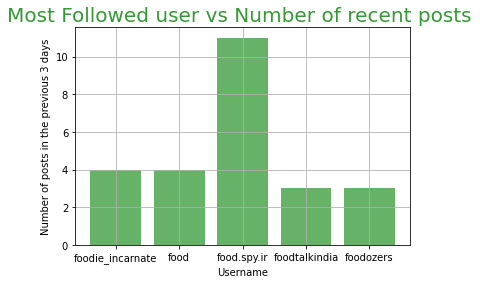

In [63]:
x = total_post_count.keys()
y = total_post_count.values()
plt.bar(x,y,color='g',alpha=0.6)
plt.ylabel("Number of posts in the previous 3 days",size=10)
plt.xlabel("Username",size=10)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

# Problem 2 : List of hashtags
#### Your friend also needs a list of hashtags that he should use in his posts.
1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
3.Create a csv file with two columns : the word and its frequency
4.Now, find the hashtags that were most popular among these bloggers
5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

# Q 2.1)

In [69]:
def extract_content(lst):
    try :
        hashtags_list = []
        for user in lst:
            #This fuction will search a user and open that profile
            open_profile(user)
            time.sleep(2)
            #just for scrolling to getting post
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = driver.find_elements_by_class_name('v1Nh3')
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                #locating all hashtag used in this post
                hashtags=driver.find_elements_by_class_name("xil3i")
                for hashtag in hashtags:
                    #appending in list
                    hashtags_list.append(hashtag.text)  
                
                #locating close button and clicking on it
                back = driver.find_elements_by_class_name('wpO6b  ')
                back[2].click()
        return hashtags_list
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [70]:
handles = list(total_post_count.keys())
hashtags = extract_content(handles)

<ipython-input-69-1c74dc1c97a9>:14: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  posts = driver.find_elements_by_class_name('v1Nh3')
<ipython-input-69-1c74dc1c97a9>:19: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  hashtags=driver.find_elements_by_class_name("xil3i")
<ipython-input-69-1c74dc1c97a9>:25: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  back = driver.find_elements_by_class_name('wpO6b  ')


In [71]:
hashtags

['#foodieincarnate',
 '#hyatt',
 '#staycation',
 '#sodelhi',
 '#mumbaiblogger',
 '#delhigram',
 '#foodtalkindia',
 '#delhiblogger',
 '#indianfoodblogger',
 '#hotelrooms',
 '#hotelblogger',
 '#hotelroom',
 '#hotelreview',
 '#mumbaifoodblogger',
 '#foodofmumbai',
 '#delhifoodblogger',
 '#delhiblogger',
 '#things2doinMumbai',
 '#fivestarhotels',
 '#delhihotels',
 '#amarsirohi',
 '#indianlifestyleblogger',
 '#gurgaonblogger',
 '#luxuryhotels',
 '#luxuryhotel',
 '#breakfastinbed',
 '#ahmedabadblogger',
 '#gurgaonblogger',
 '#delhilifestyleblogger',
 '#gurgaonfoodie',
 '#foodieincarnate',
 '#sodelhi',
 '#newdelhi',
 '#foodtalkindia',
 '#delhigram',
 '#indianfood',
 '#delhifoodblogger',
 '#foodgasm',
 '#foodporn',
 '#foodpornshare',
 '#foodlover',
 '#foodgram',
 '#foodiesofinstagram',
 '#foodie',
 '#indianstreetfood',
 '#streetfood',
 '#delhistreetfood',
 '#streetfoodindia',
 '#mumbaistreetfood',
 '#delhifoodie',
 '#foodblogger',
 '#indianfoodie',
 '#desikhana',
 '#indianfoodblogger',
 '#indi

## Q 2.2) Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [73]:
frequency = {}
words_list = []
for word in hashtags:
    frequency[word] = frequency.get(word,0) + 1
    
for i in sorted(frequency, key=frequency.get, reverse=True):
    words_list.append([i,frequency[i]])
    print(i,frequency[i])

#streetfood 20
#foodie 19
#foodtalkindia 18
#foodblogger 16
#indianfood 13
#foodieincarnate 12
#sodelhi 12
#delhifoodblogger 12
#delhifoodie 12
#foodporn 11
#foodiesofinstagram 11
#delhigram 10
#indianfoodblogger 10
#indianfoodbloggers 10
#باجناق_تیستر 10
#foodozers 10
#foodgram 9
#delhi 9
#chennai 9
#newdelhi 8
#foodgasm 8
#foodpornshare 8
#foodlover 8
#indianstreetfood 8
#delhistreetfood 8
#streetfoodindia 8
#mumbaistreetfood 8
#indianfoodie 8
#delhifood 8
#Foodieincarnate 8
#Reelitfeelit 8
#reelkarofeelkaro 8
#reelsinstagram 8
#reels 8
#foodtalk 8
#food 8
#fti 8
#delhiblogger 6
#desikhana 6
#mumbai 6
#viralfood 6
#foodies 6
#staycation 4
#delhihotels 4
#amarsirohi 4
#gurgaonblogger 4
#breakfastinbed 4
#nagpur 4
#agra 4
#viralvideos 4
#breakfast 4
#کباب 4
#HotFind 4
#biryani 4
#برگر 3
#مستر_سروش 3
#foodinstagram 3
#pizzalover 3
#hyatt 2
#mumbaiblogger 2
#hotelrooms 2
#hotelblogger 2
#hotelroom 2
#hotelreview 2
#mumbaifoodblogger 2
#foodofmumbai 2
#things2doinMumbai 2
#fivestarhotels 

## Q 2.3) Create a csv file with two columns : the word and its frequency

In [74]:
df = pd.DataFrame(words_list,columns=['Words','Frequency'])
#using .to_csv pandas function to convert dataframe to csv
df.to_csv('words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,#streetfood,20
1,#foodie,19
2,#foodtalkindia,18
3,#foodblogger,16
4,#indianfood,13
5,#foodieincarnate,12
6,#sodelhi,12
7,#delhifoodblogger,12
8,#delhifoodie,12
9,#foodporn,11


## Q 2.4) Now, find the hashtags that were most popular among these bloggers

In [75]:
print(words_list[0][0])

#streetfood


## Q 2.5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

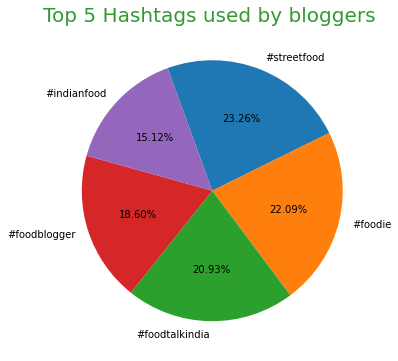

In [76]:
#using answer of problem 2.2
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=110)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='green',alpha=0.8)
plt.show()

# Question 3 : Followers : Likes ratio
#### You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:
1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.
2.Calculate the average likes for a handle.
3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
4.Create a bar graph to depict the above obtained information.



## Q 3.1) Find out the likes of the top 10 posts of the 5 handles obtained earlier

In [102]:
#This function returns list of likes of 10 post of a user
def get_likes(user):
    try:
            likes = []
            #This fuction will search a user and open that profile
            open_profile(user)
            time.sleep(2)
            #just for scrolling
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = driver.find_elements_by_class_name('v1Nh3')
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                try : 
                    #for getting like on video we need to first click on view then only we can like
                    #views = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CLASS_NAME,'vcOH2')))
                    #views.click()
                    #time.sleep(1)
                    
                    #locating like and clicking on it
                    like = driver.find_element_by_xpath("//a[@class='zV_Nj']/span")
                    no_of_likes = (like.text).replace(',' , '')
                    likes.append(int(no_of_likes))
                    time.sleep(1)
                #if the post is image then this part will execute 
                except:
                    
                    like = driver.find_element_by_xpath("//span[@class='vcOH2']/span")
                    no_of_likes = (like.text).replace(',' , '')
                    likes.append(int(no_of_likes))
                    time.sleep(1)
                #locating close button and clicking on it
                back = driver.find_elements_by_class_name('wpO6b  ')
                back[2].click()
                                

                
            return likes
    
    except TimeoutException:
        print("Something went wrong! Try Again")

In [103]:
#dct will store username with list of likes
dct = {}
for user in handles : 
    likes = get_likes(user)
    dct[user] = likes
    print('Number of likes of the top 10 posts of',user,':')
    for i in likes :
        print(i,'Likes')
    print()


<ipython-input-102-f9ea2894c3a5>:14: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  posts = driver.find_elements_by_class_name('v1Nh3')
<ipython-input-102-f9ea2894c3a5>:25: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  like = driver.find_element_by_xpath("//a[@class='zV_Nj']/span")
<ipython-input-102-f9ea2894c3a5>:37: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  back = driver.find_elements_by_class_name('wpO6b  ')
<ipython-input-102-f9ea2894c3a5>:32: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  like = driver.find_element_by_xpath("//span[@class='vcOH2']/span")


Number of likes of the top 10 posts of foodie_incarnate :
5450 Likes
58631 Likes
95916 Likes
46985 Likes
296042 Likes
59162 Likes
12939 Likes
404324 Likes
154420 Likes
21786 Likes

Number of likes of the top 10 posts of food :
5450 Likes
58631 Likes
95916 Likes
46985 Likes
296042 Likes
59162 Likes
12939 Likes
404324 Likes
154420 Likes
21786 Likes

Number of likes of the top 10 posts of food.spy.ir :
17398 Likes
35963 Likes
44159 Likes
22423 Likes
23782 Likes
31842 Likes
38546 Likes
16658 Likes
48261 Likes
20247 Likes

Number of likes of the top 10 posts of foodtalkindia :
255 Likes
189 Likes
353 Likes
360 Likes
3875 Likes
565 Likes
1396 Likes
294 Likes
681 Likes
272 Likes

Number of likes of the top 10 posts of foodozers :
7748 Likes
15679 Likes
24723 Likes
28682 Likes
82685 Likes
21290 Likes
9160 Likes
23259 Likes
14792 Likes
153561 Likes



## Q 3.2) Calculate the average likes for a handle

In [92]:
like = driver.find_element_by_xpath("//a[@class='zV_Nj']/span")
like.text

<ipython-input-92-fe5938d82250>:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  like = driver.find_element_by_xpath("//a[@class='zV_Nj']/span")


'5,450'

In [104]:
#This function will return a dictionary of {'username':average like}
def get_avg_likes(d):
    avg_likes = {}
    for key,val in d.items():
            avg = sum(val) // 10
            avg_likes[key] = avg
    return avg_likes

In [105]:
avg_likes = get_avg_likes(dct)

print('Average likes for each handle are :')
for user,likes in avg_likes.items():
    print(user, ':', likes)


Average likes for each handle are :
foodie_incarnate : 115565
food : 115565
food.spy.ir : 29927
foodtalkindia : 824
foodozers : 38157


## Q 3.3) Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [110]:
#This function will return dictionary of {'username':avg followers-like ratio}
def getavg_foll_like_ratio(top_handles,avg_like,users):
    foll_like = {}
    for i in range(5) :
        foll_like[users[i]] = int(top_handles[users[i]])//int(avg_like[users[i]])
    return foll_like

In [111]:
#here I am using the answer of problem 1.1 which contains a dictionary of {'username':followers} ie top_5_handles_final
#extracing username from top_handles
top_handles_names = list(top_5_handles_final.keys())
#now calling function getavg_foll_like_ratio(top_handles,avg_like,users) 
avg_fol_like_ratio = getavg_foll_like_ratio(top_5_handles_final, avg_likes, top_handles_names)
print('Average followers:like ratio of each handle :')
for user,ratio in avg_fol_like_ratio.items():
    print(user, ':', ratio)

Average followers:like ratio of each handle :
foodie_incarnate : 10
food : 10
food.spy.ir : 55
foodtalkindia : 373
foodozers : 8


## Q3.4) Create a bar graph to depict the above obtained information.

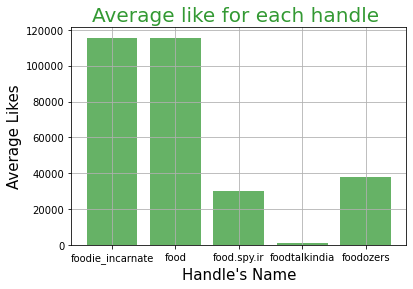

In [112]:
#for this I will use answer of problem 3.2 
username = list(avg_likes.keys())
avg_like = list(avg_likes.values())

plt.bar(username,avg_like,color='g',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

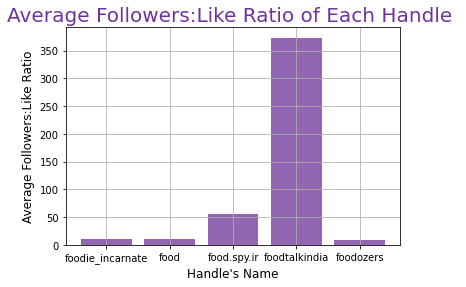

In [113]:
#For this I will use answer of problem 3.3
username = list(avg_fol_like_ratio.keys())
avg_like = list(avg_fol_like_ratio.values())

plt.bar(username,avg_like,color='Indigo',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Indigo',alpha=0.8)
plt.grid()
plt.show()